# Tutorial 3

## Channel Simulation

In [1]:
import numpy as np  # make the numpy package available and use 'np' as alias
import matplotlib.pyplot as plt  # plotting library
%matplotlib inline
import rrc  # requires rrc.py to be accessible (e.g., in the same directory)
YOUR_CODE_HERE = None  # placeholder

### Task 1
Implement a QPSK modulator as well as a channel simulator based on the examplary COST 207 "typical urban" scenario in order to investigate the effects on the communication system.

*Note*: In the following, we assume a static environment, i.e. no Doppler-shift is present.

#### a) Generate 100 equally distributed QPSK `symbols` and make use of the provided RRC-filter to pulse-shape the base-band signal `s`. 

In [2]:
nsym = 100  # number of symbols
samp_rate = 1e6  # sampling rate
sps = 32  # samples per symbol
K = 6  # length of the impulse response in symbols
rho = 0.9  # RRC rolloff factor
g = rrc.get_rrc_ir(K * sps + 1, sps, 1, rho)  # RRC impulse response

qpsk_mapping = 1/np.sqrt(2) * np.array([1+1j, -1+1j, 1-1j, -1-1j], dtype=complex)
M = qpsk_mapping.size  # modulation order

tx_symbol_indices = YOUR_CODE_HERE
symbols = qpsk_mapping[tx_symbol_indices]
s = YOUR_CODE_HERE

# solution
rng = np.random.default_rng()
tx_symbol_indices = rng.integers(M,size=nsym)
#tx_symbol_indices = np.random.randint(low=0, high=M, size=nsym)
symbols = qpsk_mapping[tx_symbol_indices]
s = np.zeros(symbols.size * sps + g.size - 1, dtype=complex)
for i in range(symbols.size):
    s[i * sps: i * sps + g.size] += symbols[i] * g

#### b) Calculate the symbol duration `T` and the sampling duration `delta_t` in a general way. 

In [3]:
T = YOUR_CODE_HERE
delta_t = YOUR_CODE_HERE

# solution
T = sps / samp_rate
delta_t = 1 / samp_rate
print("Symbol duration:", T*1e6, "us")
print("System bandwidth:", 1/T, "Hz")

Symbol duration: 32.0 us
System bandwidth: 31250.0 Hz


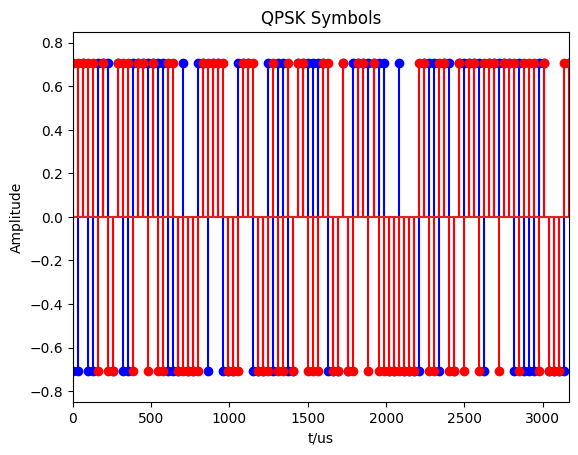

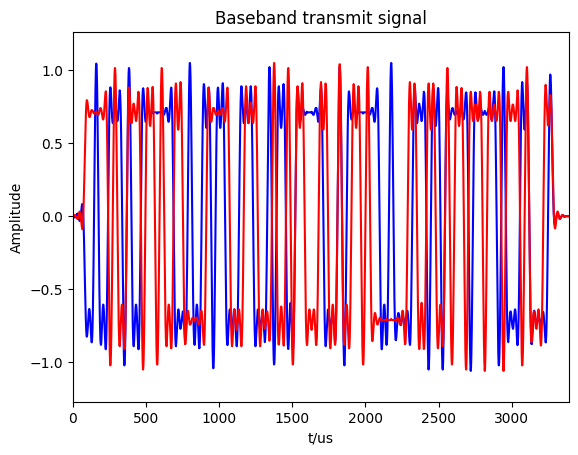

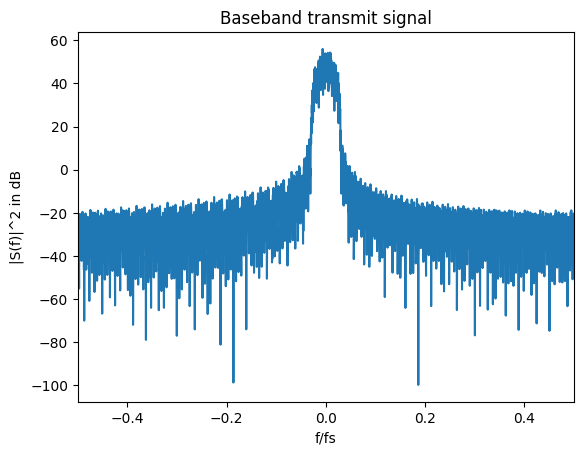

In [4]:
t0 = np.arange(symbols.size) * T
plt.stem(t0 * 1e6, symbols.real, linefmt='b'); plt.stem(t0 * 1e6, symbols.imag, linefmt='r')
plt.title("QPSK Symbols"); plt.ylabel("Amplitude"); plt.xlabel("t/us"); plt.margins(y=0.1, x=0);
plt.show()

t1 = np.arange(s.size) * delta_t
plt.plot(t1 * 1e6, s.real, 'b'); plt.plot(t1 * 1e6, s.imag, 'r')
plt.xlabel("t/us"); plt.ylabel("Amplitude")
plt.title("Baseband transmit signal"); plt.margins(y=0.1, x=0)
plt.show()

plt.plot(np.linspace(-0.5, 0.5, s.size), 10*np.log10(np.abs(np.fft.fftshift(np.fft.fft(s))**2)))
plt.xlabel("f/fs"); plt.ylabel("|S(f)|^2 in dB"); plt.xlim(-0.5, 0.5)
plt.title("Baseband transmit signal")
plt.show()

#### c) Generate an array which samples the PDP with the chosen sampling rate. 
*Note*: The Power Delay Profile (PDP) of the scenario is: P(tau) = exp(-tau * 1e6 s), if 0 < tau < 7 us, else 0.

In [6]:
t_samp = YOUR_CODE_HERE  # sample time instances
PDP = YOUR_CODE_HERE  # sampled PDP

# solution
t_samp = np.arange(start=0, stop=7*1e-6, step=delta_t)
PDP = np.exp(-t_samp * 1e6 )

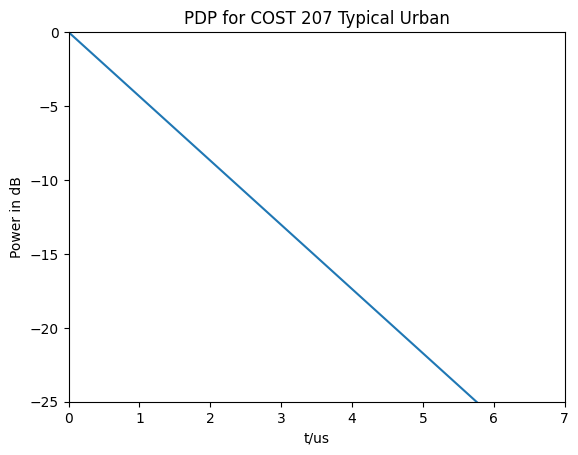

In [7]:
plt.plot(t_samp * 1e6, 10*np.log10(PDP)); plt.xlim(0, 7); plt.ylim(-25, 0); plt.xlabel('t/us'); plt.ylabel('Power in dB')
plt.title("PDP for COST 207 Typical Urban")
plt.show()

#### d) Generate a random channel impulse response whose coefficients' moduli are Rayleigh-distributed with the mean power following the PDP. 
*Note*: Think about how the coefficients are distributed if their moduli are Rayleigh-distributed.

In [8]:
h = YOUR_CODE_HERE

# solution
h = np.sqrt(PDP / 2) * (np.random.randn(PDP.size) + 1j * (np.random.randn(PDP.size)))
print(h)

[-0.19218654+0.08337085j -0.3971911 +0.60503029j -0.26264778-0.26767775j
  0.32900007+0.2098089j  -0.15674335+0.05693153j  0.05816734-0.1190529j
 -0.02142264+0.00621043j]


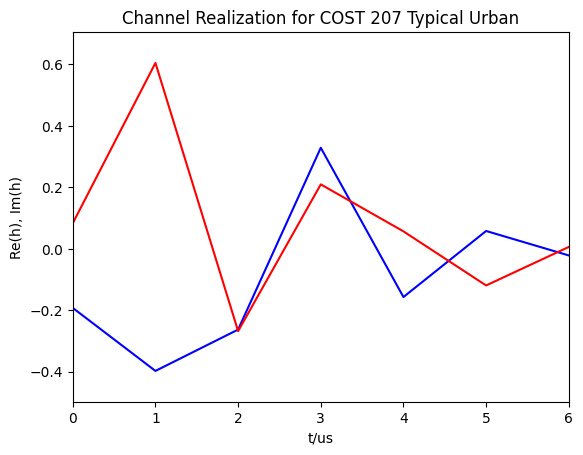

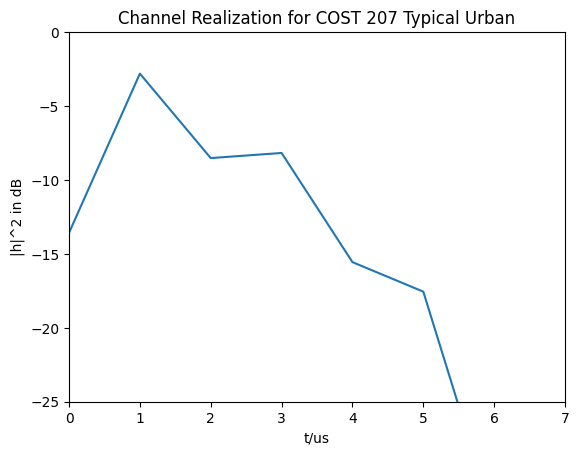

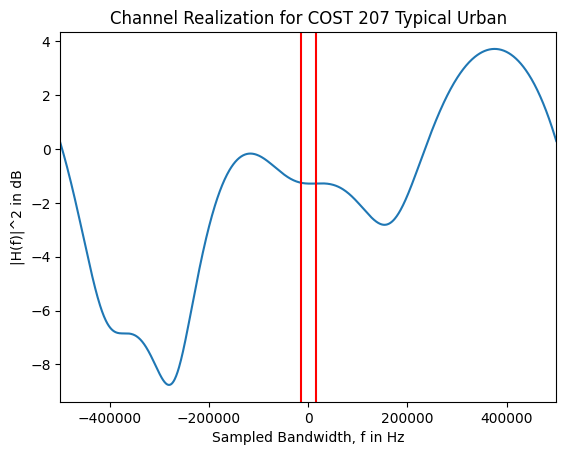

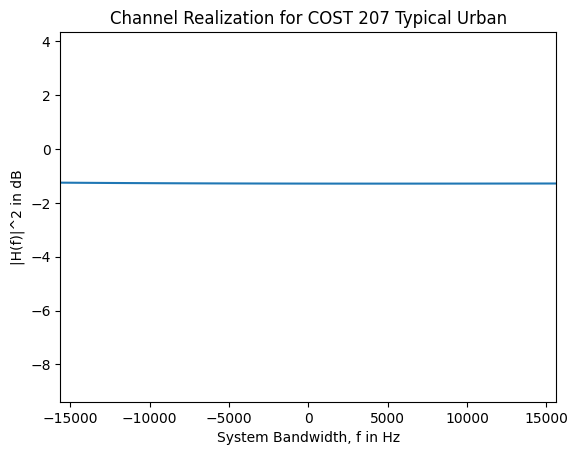

In [9]:
plt.plot(t_samp * 1e6, h.real, 'b'); plt.plot(t_samp * 1e6, h.imag, 'r')
plt.margins(y=0.1, x=0); plt.xlabel('t/us'); plt.ylabel('Re(h), Im(h)')
plt.title("Channel Realization for COST 207 Typical Urban")
plt.show()

plt.plot(t_samp * 1e6, 10*np.log10(np.abs(h)**2))
plt.xlim(0, 7); plt.ylim(-25, 0); plt.xlabel('t/us'); plt.ylabel('|h|^2 in dB')
plt.title("Channel Realization for COST 207 Typical Urban")
plt.show()

plt.plot(np.linspace(-0.5*samp_rate, 0.5*samp_rate, max(1024, h.size)), 10*np.log10(np.abs(np.fft.fftshift(np.fft.fft(h, max(h.size, 1024)))**2)))
plt.xlabel("Sampled Bandwidth, f in Hz"); plt.ylabel("|H(f)|^2 in dB"); plt.xlim(-0.5*samp_rate, 0.5*samp_rate)
plt.axvline(x=-0.5*samp_rate/sps, color='r'); plt.axvline(x=0.5*samp_rate/sps, color='r')
plt.title("Channel Realization for COST 207 Typical Urban")
plt.show()

plt.plot(np.linspace(-0.5*samp_rate, 0.5*samp_rate, max(1024, h.size)), 10*np.log10(np.abs(np.fft.fftshift(np.fft.fft(h, max(h.size, 1024)))**2)))
plt.xlabel("System Bandwidth, f in Hz"); plt.ylabel("|H(f)|^2 in dB"); plt.xlim(-0.5*samp_rate/sps, 0.5*samp_rate/sps)
plt.title("Channel Realization for COST 207 Typical Urban")
plt.show()


#### e) Apply the channel and the matched filter to the transmit signal. 

In [10]:
r = YOUR_CODE_HERE  # apply h
y = YOUR_CODE_HERE  # apply matched filter

# solution
r = np.convolve(h, s)
y = np.convolve(g, r)

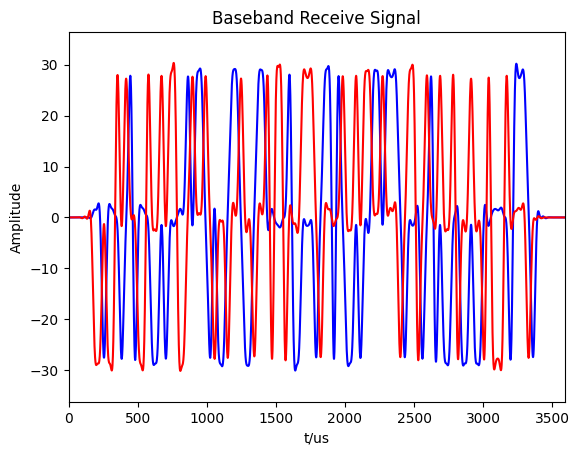

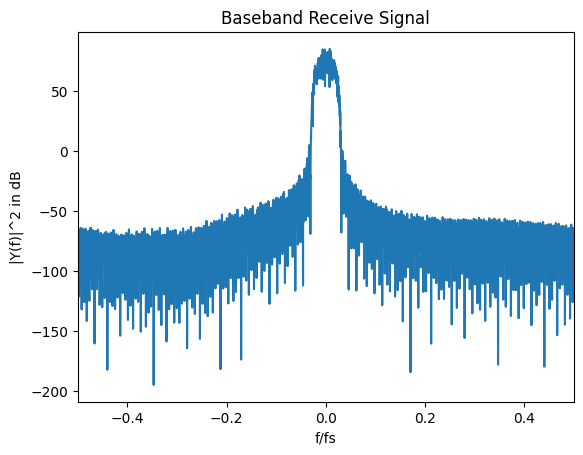

In [11]:
t1 = np.arange(y.size) * delta_t
plt.plot(t1 * 1e6, y.real, 'b'); plt.plot(t1 * 1e6, y.imag, 'r')
plt.xlabel("t/us"); plt.ylabel("Amplitude")
plt.title("Baseband Receive Signal"); plt.margins(y=0.1, x=0)
plt.show()

plt.plot(np.linspace(-0.5, 0.5, y.size), 10*np.log10(np.abs(np.fft.fftshift(np.fft.fft(y))**2)))
plt.xlabel("f/fs"); plt.ylabel("|Y(f)|^2 in dB"); plt.xlim(-0.5, 0.5)
plt.title("Baseband Receive Signal")
plt.show()

#### f) Sample the symbols and consider the filter delays. 

In [12]:
rx_symbols = YOUR_CODE_HERE

# solution
delay = 2 * (g.size - 1)//2  # no delay for h (exponential decay has most power in the first tap)
rx_symbols = y[delay:-delay-sps:sps]

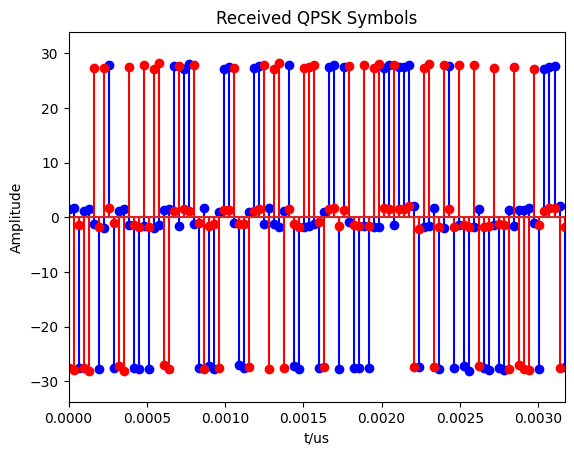

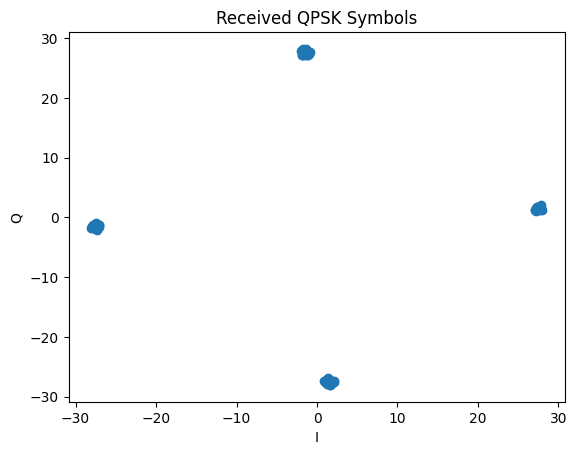

In [13]:
t_sym = np.arange(rx_symbols.size) * T
plt.stem(t_sym, rx_symbols.real, linefmt='b'); plt.stem(t_sym, rx_symbols.imag, linefmt='r')
plt.title("Received QPSK Symbols"); plt.ylabel("Amplitude"); plt.xlabel("t/us"); plt.margins(y=0.1, x=0)
plt.show()

plt.scatter(rx_symbols.real, rx_symbols.imag)
plt.xlabel('I'); plt.ylabel('Q'); plt.title("Received QPSK Symbols");

#### g) Calculate (in case of flat fading) the constellation diagramme's rotation due to `h` and compensate the symbols correspondingly. 

In [14]:
angle = YOUR_CODE_HERE  # in radians
rx_symbols_rot = YOUR_CODE_HERE

# solution
angle = np.angle(np.sum(h))

# sometimes we don't have h, then there are other ways
#angle = np.mean(np.angle(rx_symbols**4))/4+np.pi/4 #now only rotations around pi/2 need correcting

rx_symbols_rot = rx_symbols * np.exp(-1j * angle)



Detected angle: 138.2152782097605 degrees


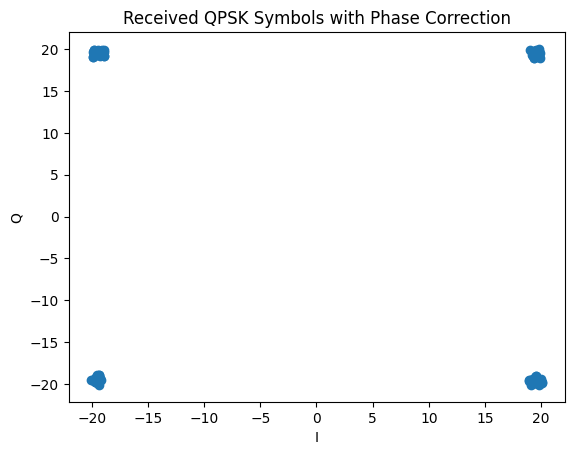

In [15]:
print("Detected angle:", angle / np.pi * 180, "degrees")
plt.scatter(rx_symbols_rot.real, rx_symbols_rot.imag)
plt.xlabel('I'); plt.ylabel('Q'); plt.title("Received QPSK Symbols with Phase Correction");

#### h) Estimate the symbol indices from the received symbols. Use the ML criterium for decision. 

In [16]:
rx_symbol_indices = YOUR_CODE_HERE

# solution
rx_symbol_indices = np.zeros(rx_symbols_rot.size, dtype=int)
for i, sym in enumerate(rx_symbols_rot):
    if sym.real > 0 and sym.imag > 0:
        rx_symbol_indices[i] = 0
    elif sym.real < 0 and sym.imag > 0:
        rx_symbol_indices[i] = 1
    elif sym.real > 0 and sym.imag < 0:
        rx_symbol_indices[i] = 2
    else:
        rx_symbol_indices[i] = 3

In [17]:
SER = sum([rx != tx for (rx, tx) in zip(rx_symbol_indices, tx_symbol_indices)])/nsym
if SER == 0:
    print("Transmission successful!")
else:
    print("Error(s) occured! Symbol error rate:", SER)

Transmission successful!


## Comprehensive Questions

#### Regarding Simulation
Run the simulation with `sps=32`, `sps=8` und `sps=2`.
*Note*: Run the simulation with the same settings for multiple times in order to generate various realisations.

1. Bring to your mind how large the delay spread and the coherence bandwidth are and how they relate to the symbol duration.
2. Evaluate the channel regarding the coherence terms *flat* and *frequency selective*. *Answer:* The coherence bandwidth is approx. 1/(2*Td) = 71500 Hz. Hence, the channel acts more or less flat to the system at `sps=32`, while for the other configurations it is increasingly frequency selective. 
3. Is the fading *slow* or *fast*? *Answer:* Since we considered the channel as time-invariant, the fading is *slow*.
4. How is the procedure of subtask g) usually called? Which condition must hold in order to correct successfully? Why is there no amplitude correction? *Answer:* This is basically a phase synchronisation or phase recovery. The rotation must be less then 2*\pi. Since we have a PSK system, amplitude correction is unneccessary. 

#### General
1. Which kind of fading has rather to be considered at high-speed transmissions? *Answer:* Since, for high-speed systems, the bandwidth is potentially higher as the coherence bandwidth, frequency selective fading has to be considered.
2. Which options do you have for designing your system if you want flat fading charactersistics at high-speed transmission? *Answer:* You can use e.g. multi-carrier approaches such as OFDM which distribute a wide channel into many small, and hence flat, subchannels. 